In [1]:
import pandas as pd
df = pd.read_csv('data/Land_Registry.csv')

C:\Users\Alex\AppData\Local\Temp\ipykernel_31640\1125725110.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Land_Registry.csv')


In [2]:
# Take a look at the first few rows
print("Head of the DataFrame:")
print(df.head())

# Step 2: Check for missing values
# Count the number of missing values in each column
print("\nMissing values for each column:")
print(df.isnull().sum())

# Step 3: Analyze the data type for column 5
# Show unique values in column 5 to understand what types of data it contains
print("\nUnique values in column 5:")
print(df.iloc[:, 5].unique())

Head of the DataFrame:
   property_id  area_id  zone_id area_name_ar area_name_en land_number  \
0   1100148044      494        2     أم الدمن  Umm Addamin           1   
1   1100240451      494        2     أم الدمن  Umm Addamin          10   
2   1100156321      494        2     أم الدمن  Umm Addamin           2   
3   1100159052      494        2     أم الدمن  Umm Addamin           3   
4   1100159143      494        2     أم الدمن  Umm Addamin           4   

   land_sub_number  actual_area  property_type_id property_type_ar  ...  \
0                0    301448.81                 1              ارض  ...   
1                0  30983537.94                 1              ارض  ...   
2                0     14864.48                 1              ارض  ...   
3                0    140500.52                 1              ارض  ...   
4                0    140500.52                 1              ارض  ...   

  separated_reference  project_id project_name_ar project_name_en  \
0           

In [3]:
# List of column names to drop
columns_to_drop = [col for col in df.columns if col.endswith('_ar')]

# Drop these columns
df.drop(columns=columns_to_drop, inplace=True)

# Show the updated DataFrame
print(df.head())

   property_id  area_id  zone_id area_name_en land_number  land_sub_number  \
0   1100148044      494        2  Umm Addamin           1                0   
1   1100240451      494        2  Umm Addamin          10                0   
2   1100156321      494        2  Umm Addamin           2                0   
3   1100159052      494        2  Umm Addamin           3                0   
4   1100159143      494        2  Umm Addamin           4                0   

   actual_area  property_type_id property_type_en  property_sub_type_id  ...  \
0    301448.81                 1             Land                   1.0  ...   
1  30983537.94                 1             Land                  64.0  ...   
2     14864.48                 1             Land                  64.0  ...   
3    140500.52                 1             Land                   NaN  ...   
4    140500.52                 1             Land                  34.0  ...   

  is_registered  pre_registration_number  separate

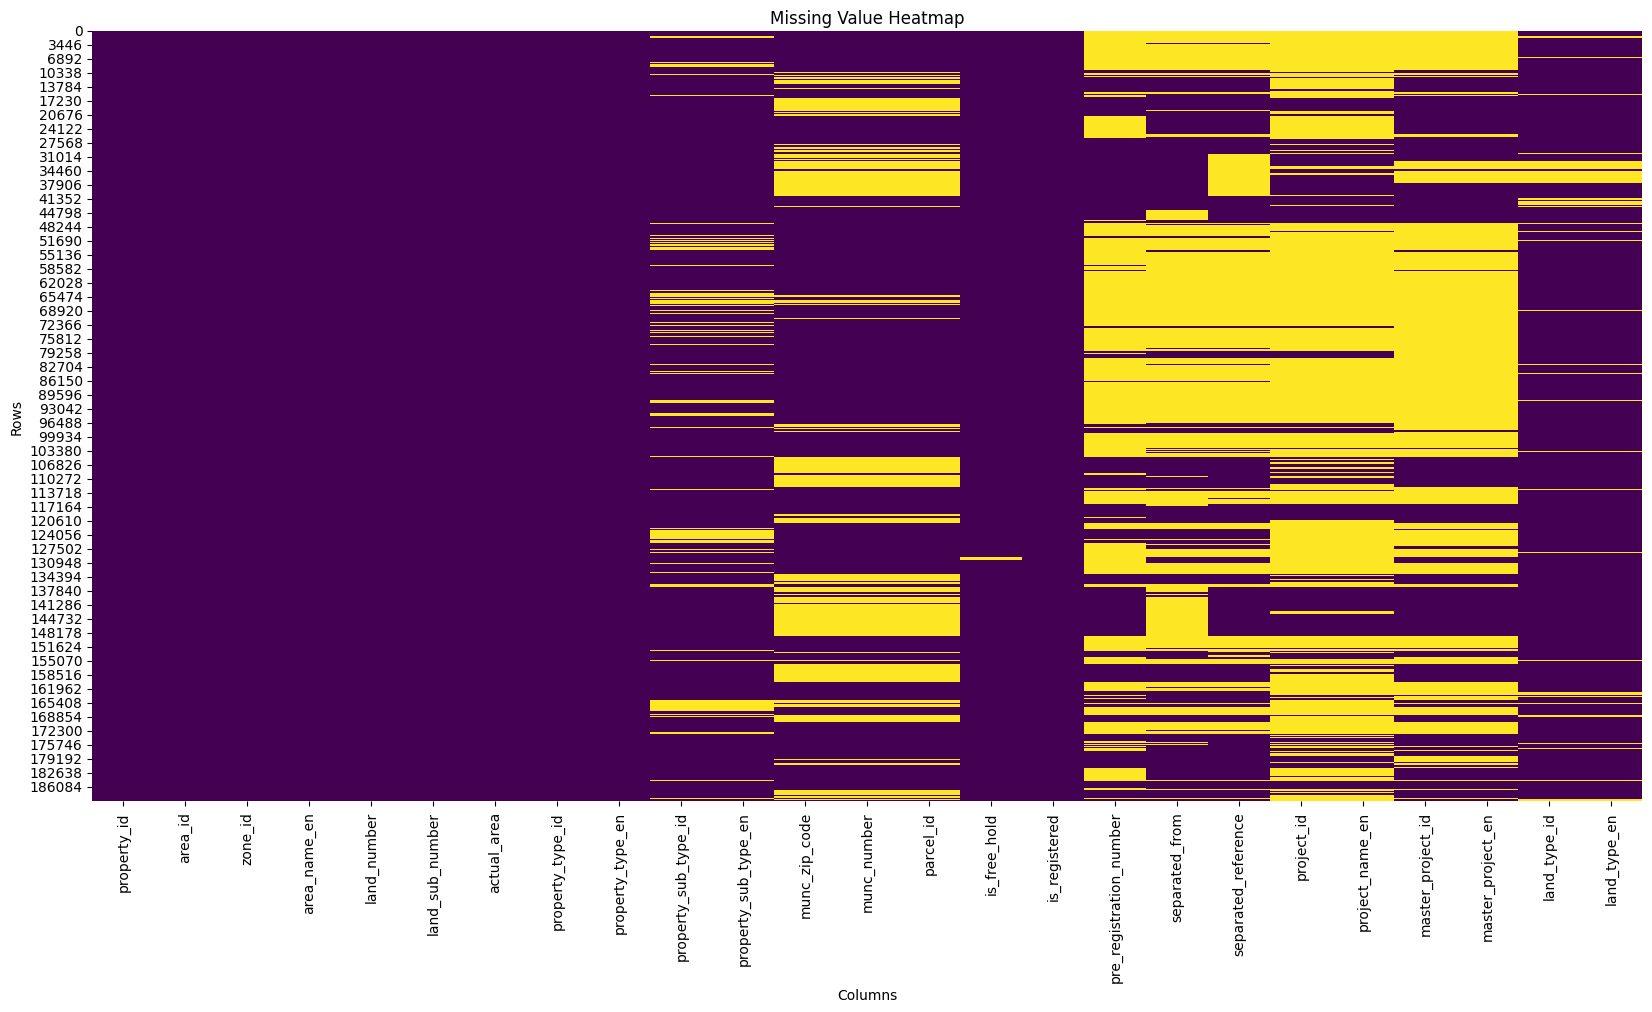

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame
# df = pd.read_csv('data/Land_Registry.csv')

# Initialize plot
plt.figure(figsize=(20, 10))

# Create a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Add title and labels
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()


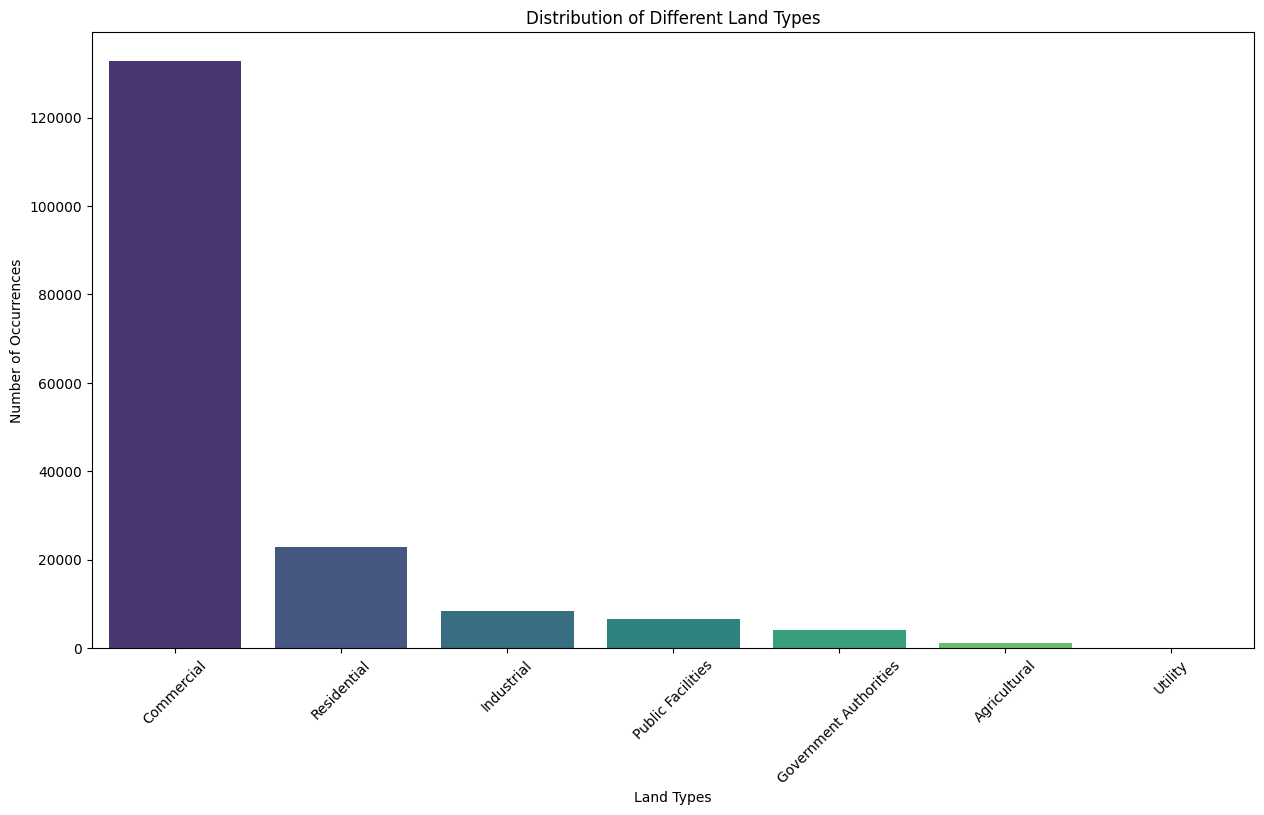

In [6]:
# Count the occurrences of each land type
land_type_counts = df['land_type_en'].value_counts()

# Initialize the plot
plt.figure(figsize=(15, 8))

# Create a bar plot
sns.barplot(x=land_type_counts.index, y=land_type_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Land Types')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Different Land Types')

# Rotate x labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

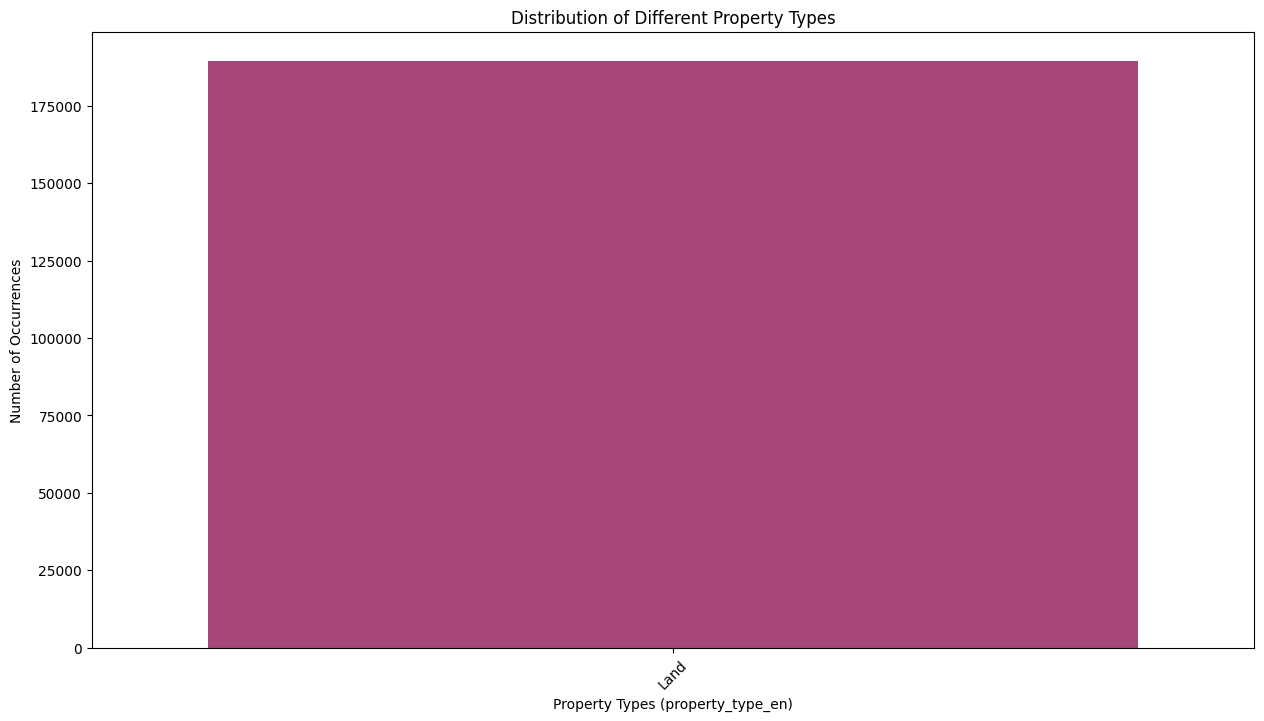

In [7]:
# Count the occurrences of each property type
property_type_counts = df['property_type_en'].value_counts()

# Initialize the plot
plt.figure(figsize=(15, 8))

# Create a bar plot
sns.barplot(x=property_type_counts.index, y=property_type_counts.values, palette="magma")

# Add labels and title
plt.xlabel('Property Types (property_type_en)')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Different Property Types')

# Rotate x labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [8]:
import pandas as pd
import plotly.express as px

# Assume df is your DataFrame and it has columns named 'land_type_en' and 'actual_area'
# df = pd.read_csv('your_data.csv')

# Group by land_type_en and sum up the actual_area
grouped_data = df.groupby('land_type_en')['actual_area'].sum().reset_index()

# Create the treemap
fig = px.treemap(grouped_data,
                 path=['land_type_en'],
                 values='actual_area',
                 title='Distribution of Different Land Types Based on Sum of Actual Area')

# Show the figure
fig.show()
